In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
tc=pd.read_csv(r"C:\Users\VIRAJ KAMAT\Desktop\Data Science\Assignments\Multiple linear regression\ToyotaCorolla.csv")
tc.head(1)

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0


In [3]:
tc=tc[["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]
tc.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [4]:
tc.shape

(1436, 9)

In [5]:
tc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1436 non-null   int64
 1   Age_08_04      1436 non-null   int64
 2   KM             1436 non-null   int64
 3   HP             1436 non-null   int64
 4   cc             1436 non-null   int64
 5   Doors          1436 non-null   int64
 6   Gears          1436 non-null   int64
 7   Quarterly_Tax  1436 non-null   int64
 8   Weight         1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


In [6]:
tc.describe()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,1576.85585,4.033426,5.026462,87.122563,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,424.38677,0.952677,0.188510,41.128611,52.64112
min,4350.000000,1.000000,1.000000,69.000000,1300.00000,2.000000,3.000000,19.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.00000,3.000000,5.000000,69.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,1600.00000,4.000000,5.000000,85.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,1600.00000,5.000000,5.000000,85.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,16000.00000,5.000000,6.000000,283.000000,1615.00000


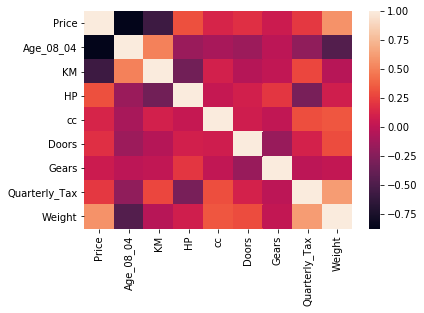

In [7]:
sns.heatmap(tc.corr())

In [8]:
tc.corr()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198
Age_08_04,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614
cc,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618
Gears,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613
Quarterly_Tax,0.219197,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134
Weight,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000


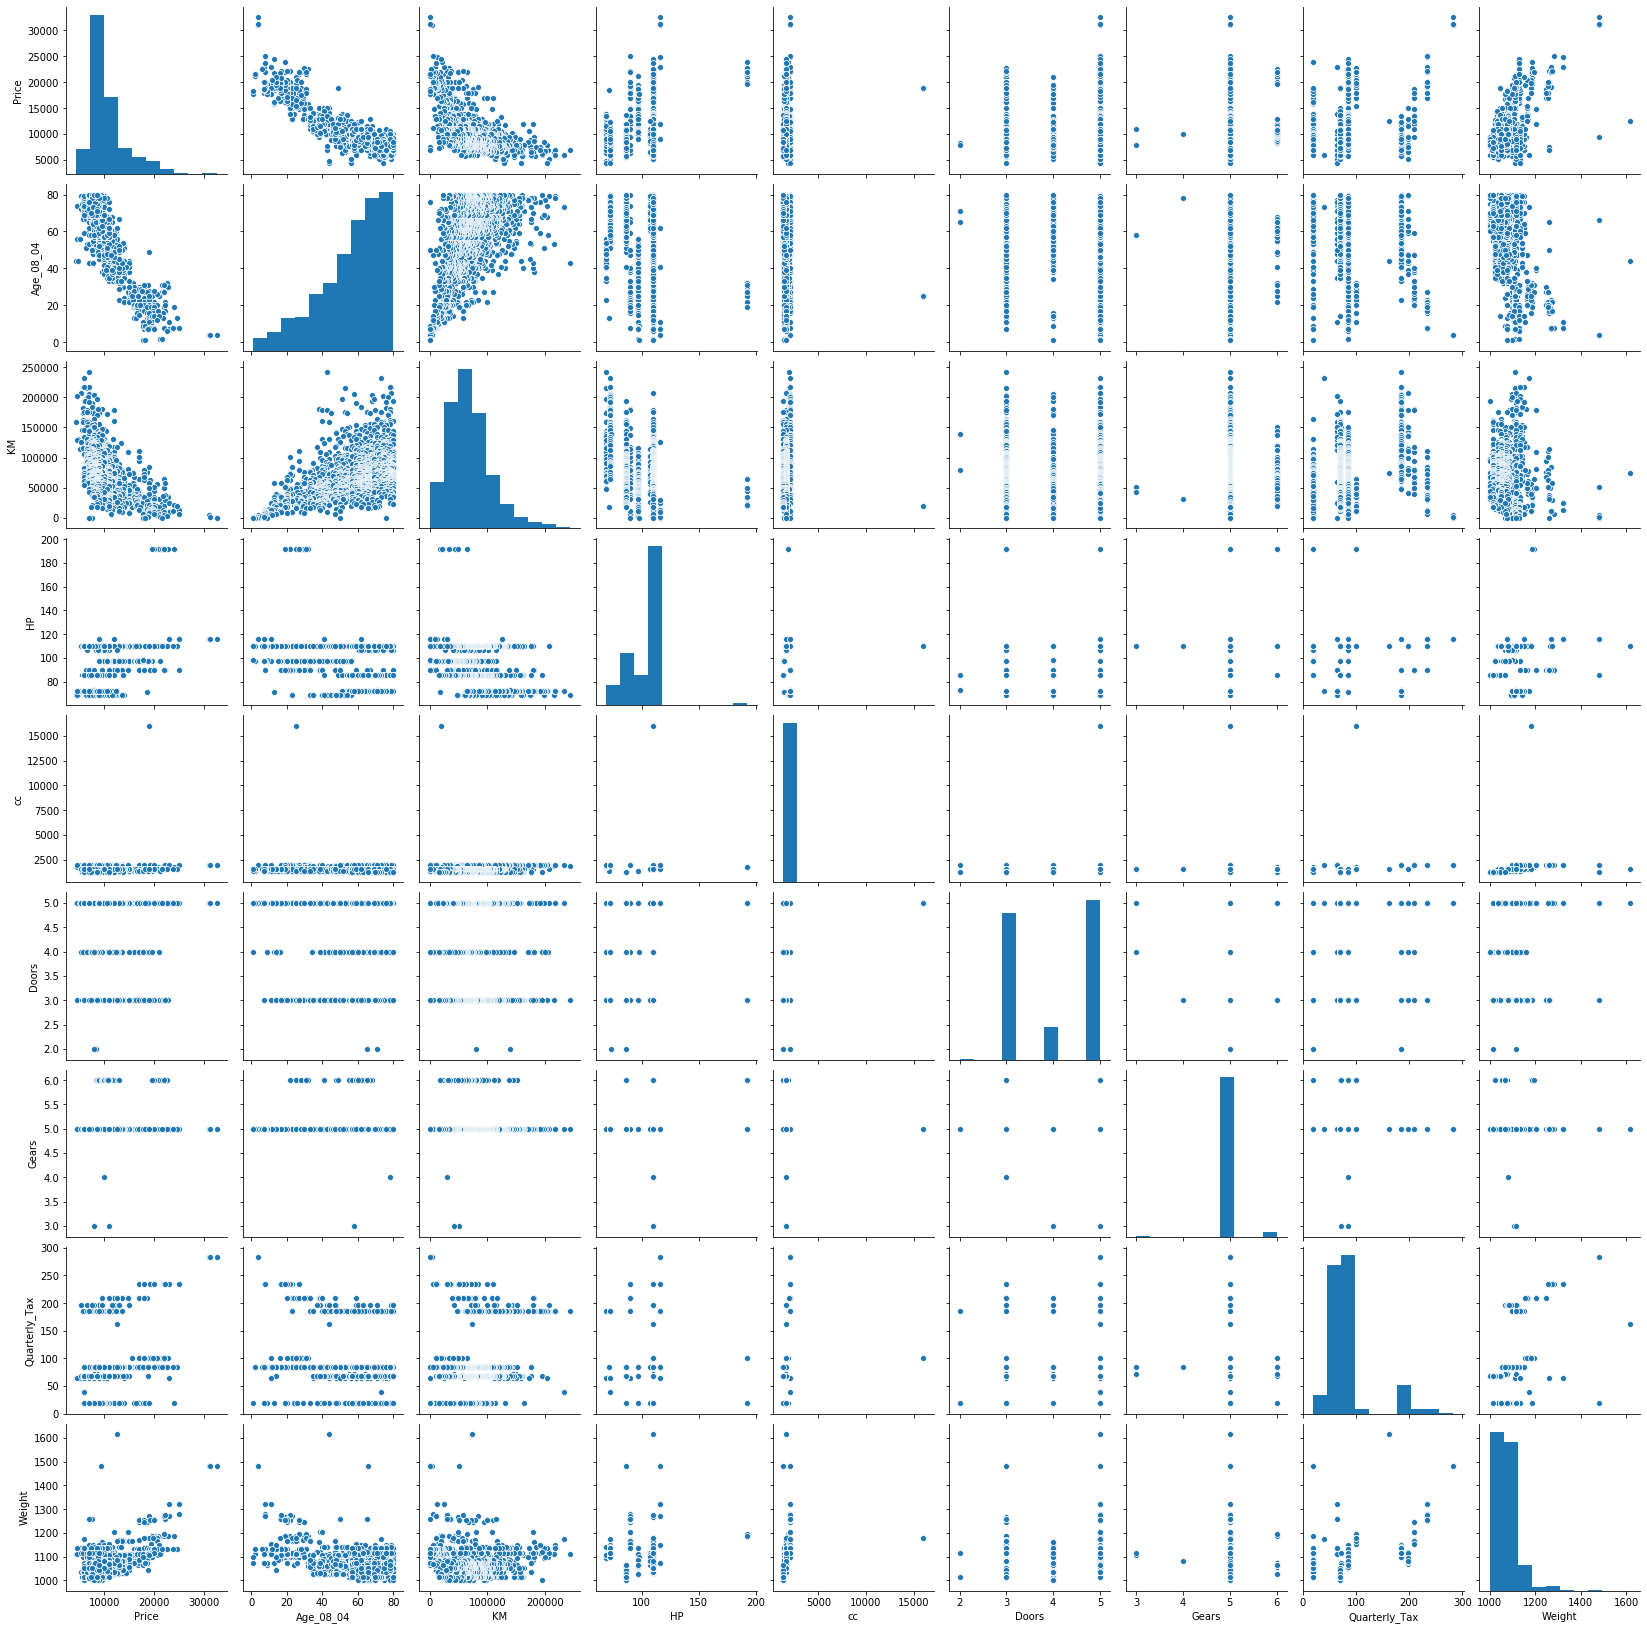

In [9]:
sns.pairplot(tc)

we can say that there is no correlation between input variables.Age and price have strong correlation.and KM and Weight have moderate correlation.and other inputs have very low correlation.so we can drop other input variables

In [10]:
tc=tc[['Age_08_04','KM','Weight','Price']]
tc.head()

,Age_08_04,KM,Weight,Price
0,23,46986,1165,13500
1,23,72937,1165,13750
2,24,41711,1165,13950
3,26,48000,1165,14950
4,30,38500,1170,13750


Normalising data

In [11]:
from sklearn.preprocessing import MinMaxScaler
array=tc.values
scaler=MinMaxScaler()
data=scaler.fit_transform(array)
tc1=pd.DataFrame(data,columns=('Age_08_04','KM','Weight','Price'))
tc1.head()

,Age_08_04,KM,Weight,Price
0,0.278481,0.193355,0.268293,0.325044
1,0.278481,0.300149,0.268293,0.333925
2,0.291139,0.171647,0.268293,0.341030
3,0.316456,0.197528,0.268293,0.376554
4,0.367089,0.158433,0.276423,0.333925


Prepearing a model

In [12]:
model=smf.ols("Price~Age_08_04+KM+Weight",data=tc1).fit()

In [13]:
model.params

Intercept    0.469821
Age_08_04   -0.337388
KM          -0.208754
Weight       0.427683
dtype: float64

In [14]:
print(model.tvalues ,'\n',model.pvalues)

Intercept    79.585935
Age_08_04   -43.841468
KM          -20.141779
Weight       23.409444
dtype: float64 
 Intercept     0.000000e+00
Age_08_04    6.162098e-267
KM            1.221576e-79
Weight       6.992783e-103
dtype: float64


In [15]:
print(model.rsquared,model.rsquared_adj)

0.848104243893788 0.8477860265276438


model accuracy is 84% 

we will improve our model using cooks distance

In [16]:
model_influence=model.get_influence()
(c, _)=model_influence.cooks_distance

C:\Users\VIRAJ KAMAT\anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


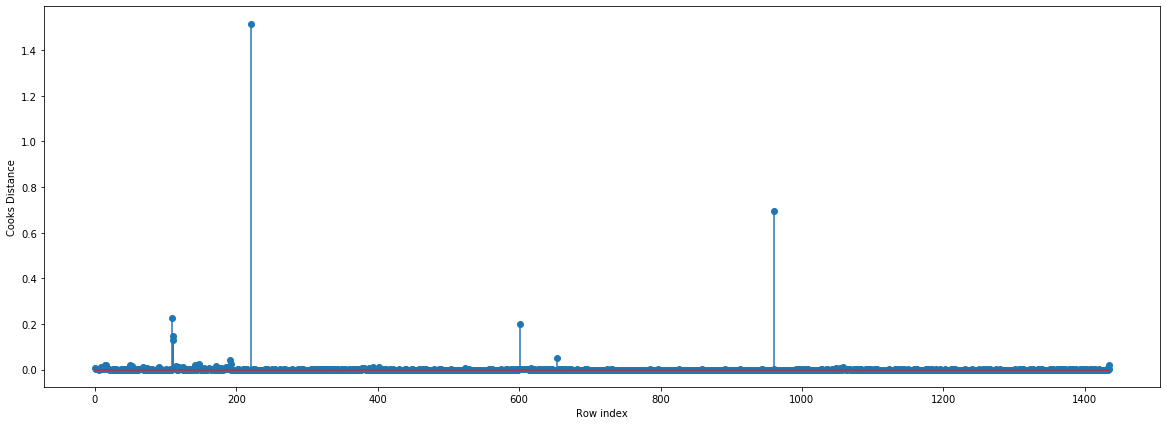

In [18]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(tc1)),np.round(c, 3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [19]:
(np.argmax(c),np.max(c))

(221, 1.516544835239971)

In [20]:
tc2=tc1.drop(tc1.index[[221]],axis=0)
tc3=tc2.reset_index()
tc3=tc3.drop(['index'],axis=1)

In [21]:
model_new=smf.ols("Price~Age_08_04+KM+Weight",data=tc3).fit()
print(model_new.rsquared,model_new.rsquared_adj)

0.8541764812976809 0.8538707716148668


In [26]:
model_new_influence=model_new.get_influence()
(c, _)=model_new_influence.cooks_distance

C:\Users\VIRAJ KAMAT\anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


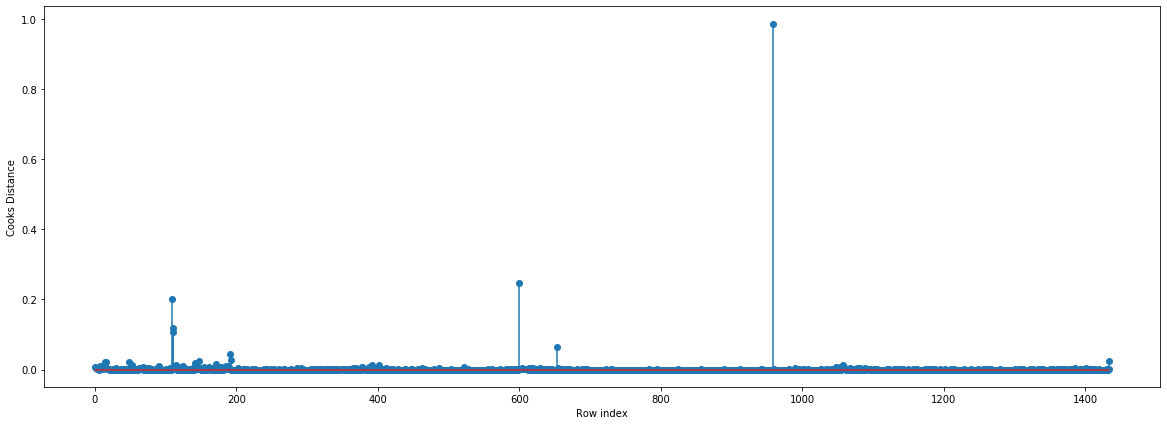

In [27]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(tc3)),np.round(c, 3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [28]:
(np.argmax(c),np.max(c))

(959, 0.9869601873877121)

In [33]:
tc4=tc3.drop(tc3.index[[959]],axis=0)
tc4=tc4.reset_index()
tc4=tc4.drop(['index'],axis=1)

In [34]:
model_new=smf.ols("Price~Age_08_04+KM+Weight",data=tc4).fit()
print(model_new.rsquared,model_new.rsquared_adj)

0.8592417428807524 0.8589464458378449


C:\Users\VIRAJ KAMAT\anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  after removing the cwd from sys.path.


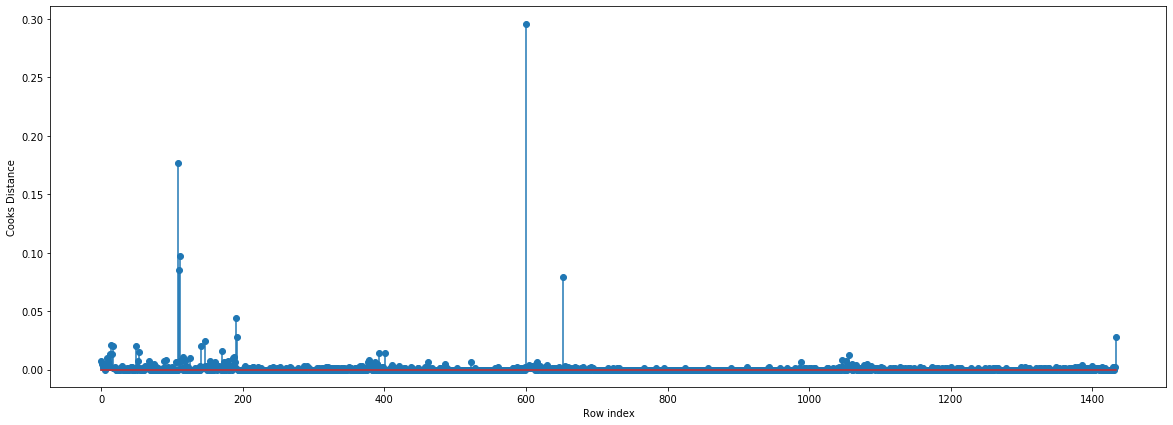

In [35]:
model_new_influence=model_new.get_influence()
(c, _)=model_new_influence.cooks_distance
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(tc4)),np.round(c, 3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [36]:
(np.argmax(c),np.max(c))

(600, 0.2959879619460092)

In [37]:
tc5=tc4.drop(tc4.index[[600]],axis=0)
tc5=tc5.reset_index()
tc5=tc5.drop(['index'],axis=1)

In [38]:
model_final=smf.ols("Price~Age_08_04+KM+Weight",data=tc5).fit()
print(model_final.rsquared,model_final.rsquared_adj)

0.8646407845721461 0.864356615470478


we have increased model accuracy to 86%